##**Tech Challenge Fase 4**



---
Realizando a extração dos dados do arquivo "Obesity" e análise dos tipos de dados e tranformações necessárias

In [ ]:
import pandas as pd

In [ ]:
filepath = "https://raw.githubusercontent.com/Naiderossi/TechChallengeF4/refs/heads/main/Obesity.csv"
df = pd.read_csv(filepath, sep = ',')

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [ ]:
#Ajustando as colunas Age, FAF, e NCP para que sejam numeros inteiros já que se referem a frequencia e idade.
df['Age'] = df['Age'].astype(int)
df['FAF'] = df['FAF'].astype(int)
df['NCP'] = df['NCP'].astype(int)

In [ ]:
#Verificando dados da coluna FCVC, pois pela descrição deveriam trazer dados como "Sim/Não"
df['FCVC'].unique()

array([2.      , 3.      , 1.      , 2.450218, 2.880161, 2.00876 ,
       2.596579, 2.591439, 2.392665, 1.123939, 2.027574, 2.658112,
       2.88626 , 2.714447, 2.750715, 1.4925  , 2.205439, 2.059138,
       2.310423, 2.823179, 2.052932, 2.596364, 2.767731, 2.815157,
       2.737762, 2.568063, 2.524428, 2.971574, 1.0816  , 1.270448,
       1.344854, 2.959658, 2.725282, 2.844607, 2.44004 , 2.432302,
       2.592247, 2.449267, 2.929889, 2.015258, 1.031149, 1.592183,
       1.21498 , 1.522001, 2.703436, 2.362918, 2.14084 , 2.5596  ,
       2.336044, 1.813234, 2.724285, 2.71897 , 1.133844, 1.757466,
       2.979383, 2.204914, 2.927218, 2.88853 , 2.890535, 2.530066,
       2.241606, 1.003566, 2.652779, 2.897899, 2.483979, 2.945967,
       2.478891, 2.784464, 1.005578, 2.938031, 2.842102, 1.889199,
       2.943749, 2.33998 , 1.950742, 2.277436, 2.371338, 2.984425,
       2.977018, 2.663421, 2.753752, 2.318355, 2.594653, 2.886157,
       2.967853, 2.619835, 1.053534, 2.530233, 2.8813  , 2.824

In [ ]:
# A coluna fcvc (Você costuma comer vegetais nas suas refeições?) nào possui resultados coerentes com a legenda da coluna, dessa forma, será excluída da análise.
df.drop(columns=['FCVC'], inplace=True)

In [ ]:
#Quantidade de linhas e colunas do dataframe:
df.shape

(2111, 16)

In [ ]:
#Fazendo padronização dos nomes das colunas para torná-las mais legíveis

df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r"[^\w\s]", "", regex=True)
)

In [ ]:
#Verificado que não existem linhas nulas
df.isnull().sum()

,0
gender,0
age,0
height,0
weight,0
family_history,0
favc,0
ncp,0
caec,0
smoke,0
ch2o,0


In [ ]:
#Verificando se há linhas duplicadas
duplicadas = df[df.duplicated(subset=df.columns.difference(['index']), keep=False)]

In [ ]:
print(f"{len(duplicadas)} linhas duplicadas encontradas:")
duplicadas.sort_values(by=list(df.columns)).reset_index(drop=True)

35 linhas duplicadas encontradas:


,gender,age,height,weight,family_history,favc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,obesity
0,Female,16,1.66,58.0,no,no,1,Sometimes,no,1.0,no,0,1.0,no,Walking,Normal_Weight
1,Female,16,1.66,58.0,no,no,1,Sometimes,no,1.0,no,0,1.0,no,Walking,Normal_Weight
2,Female,18,1.62,55.0,yes,yes,3,Frequently,no,1.0,no,1,1.0,no,Public_Transportation,Normal_Weight
3,Female,18,1.62,55.0,yes,yes,3,Frequently,no,1.0,no,1,1.0,no,Public_Transportation,Normal_Weight
4,Female,21,1.52,42.0,no,no,1,Frequently,no,1.0,no,0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
5,Female,21,1.52,42.0,no,no,1,Frequently,no,1.0,no,0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
6,Female,21,1.52,42.0,no,yes,1,Frequently,no,1.0,no,0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
7,Female,21,1.52,42.0,no,yes,1,Frequently,no,1.0,no,0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
8,Female,21,1.52,42.0,no,yes,1,Frequently,no,1.0,no,0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
9,Female,21,1.52,42.0,no,yes,1,Frequently,no,1.0,no,0,0.0,Sometimes,Public_Transportation,Insufficient_Weight


In [ ]:
# Há 35 linhas duplicadas, as mesmas serão removidas para não enviesar o treinamento do modelo que será criado.
df = df.drop_duplicates(subset=df.columns.difference(['index']))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2086 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2086 non-null   object 
 1   age             2086 non-null   int64  
 2   height          2086 non-null   float64
 3   weight          2086 non-null   float64
 4   family_history  2086 non-null   object 
 5   favc            2086 non-null   object 
 6   ncp             2086 non-null   int64  
 7   caec            2086 non-null   object 
 8   smoke           2086 non-null   object 
 9   ch2o            2086 non-null   float64
 10  scc             2086 non-null   object 
 11  faf             2086 non-null   int64  
 12  tue             2086 non-null   float64
 13  calc            2086 non-null   object 
 14  mtrans          2086 non-null   object 
 15  obesity         2086 non-null   object 
dtypes: float64(4), int64(3), object(9)
memory usage: 277.0+ KB


In [ ]:
df['obesity'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [ ]:
df.to_csv('Obesity_tratado.csv', index=False)

###Análise exploratória inicial

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#separando as features categóricas e numéricas
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Numerical features: ['age', 'height', 'weight', 'ncp', 'ch2o', 'faf', 'tue']
Categorical features: ['gender', 'family_history', 'favc', 'caec', 'smoke', 'scc', 'calc', 'mtrans', 'obesity']


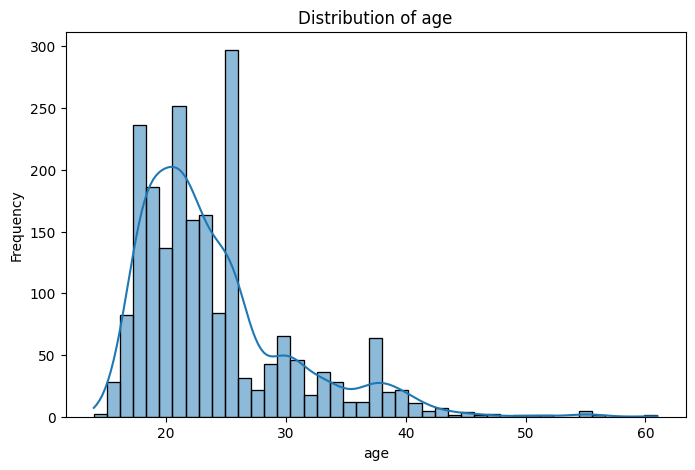

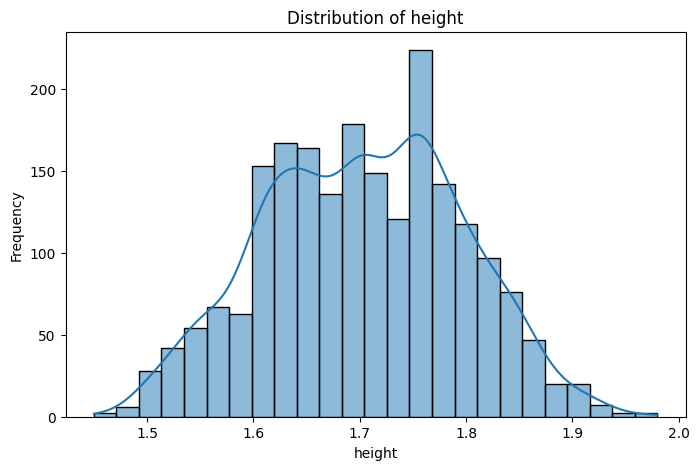

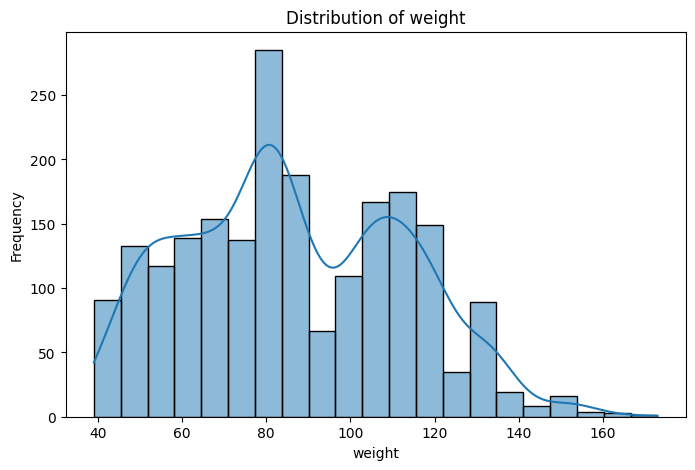

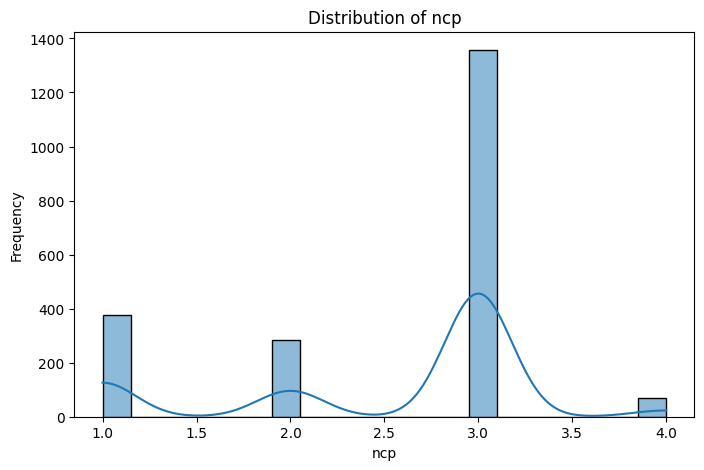

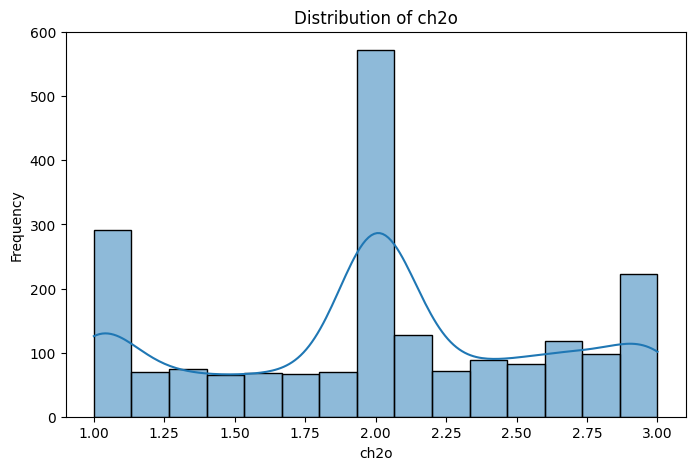

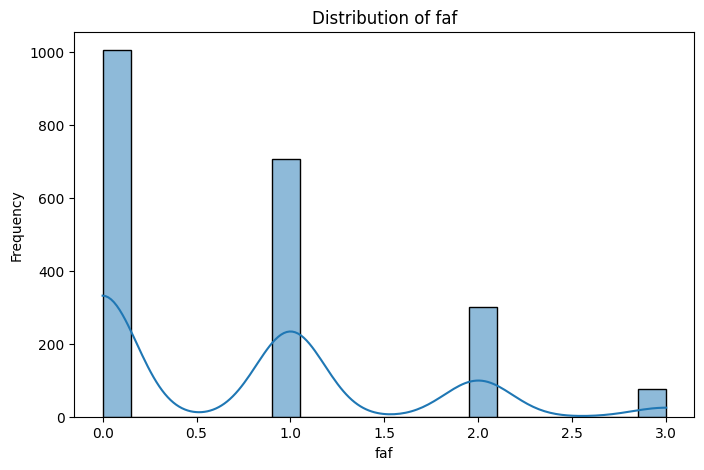

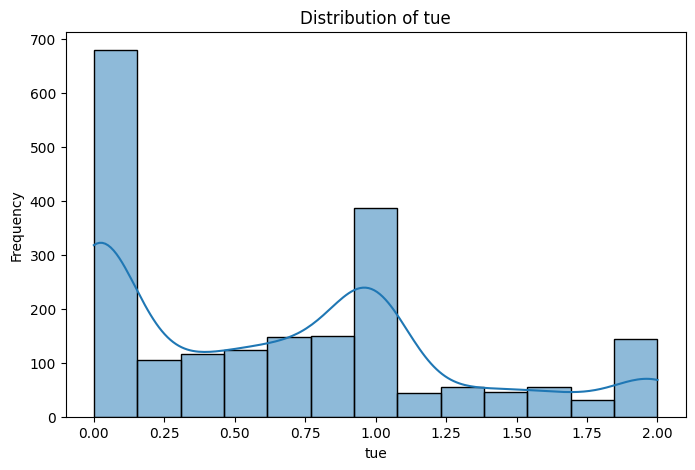

In [ ]:
for col in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

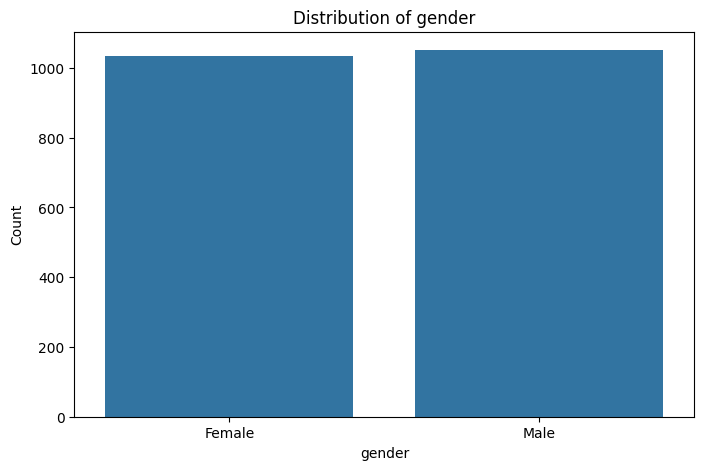

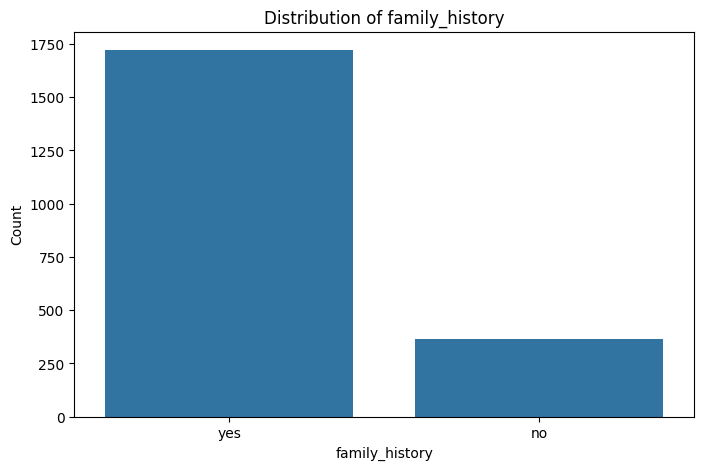

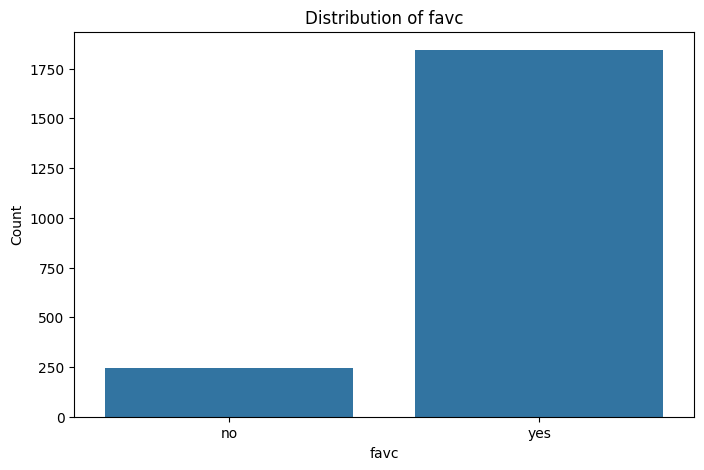

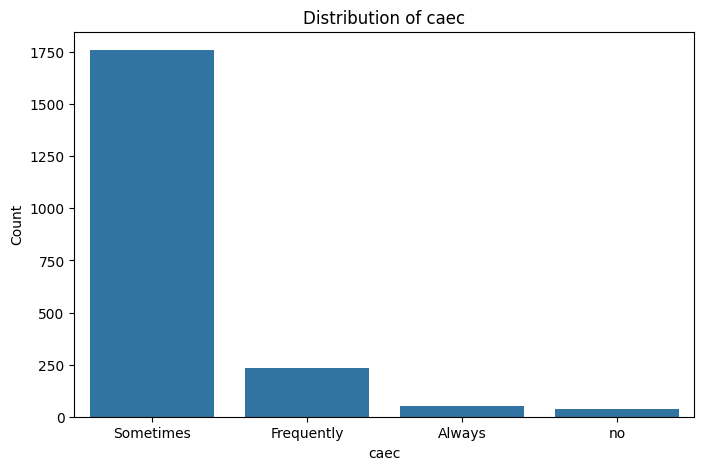

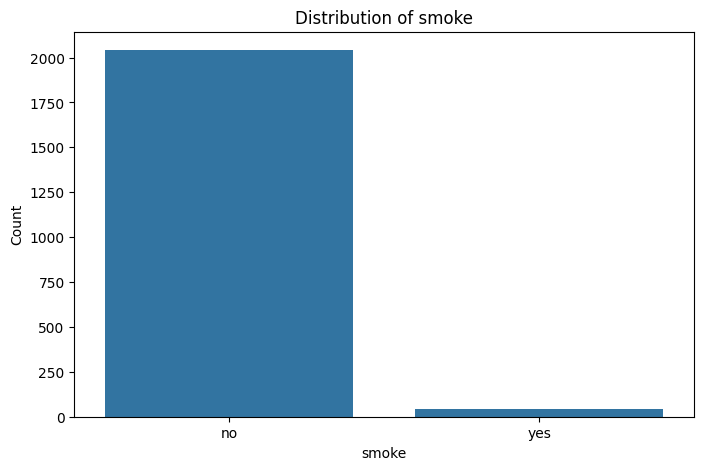

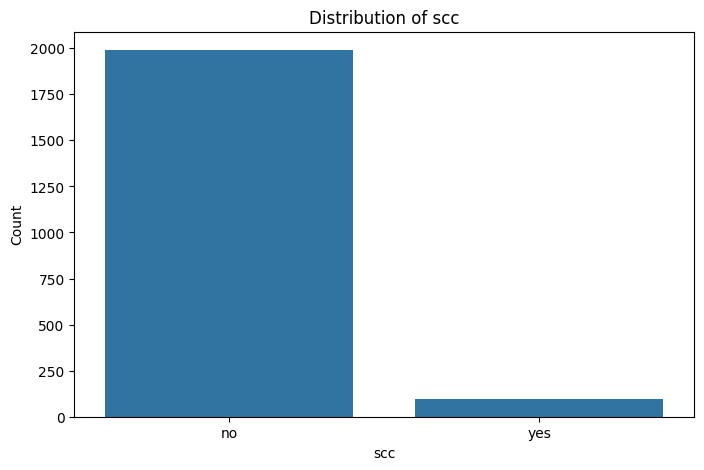

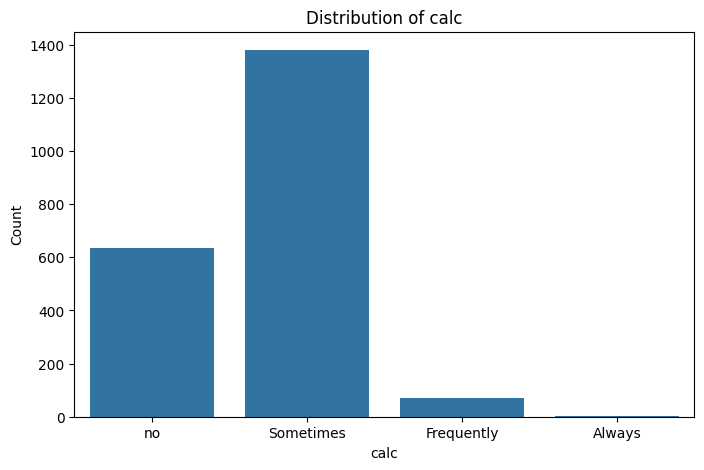

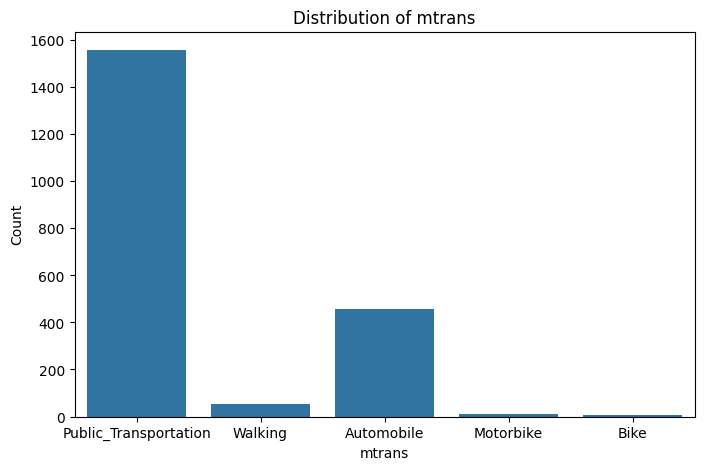

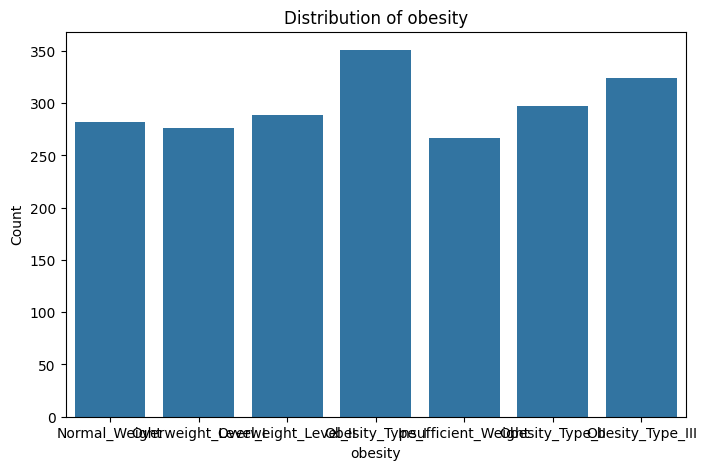

In [ ]:
for col in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

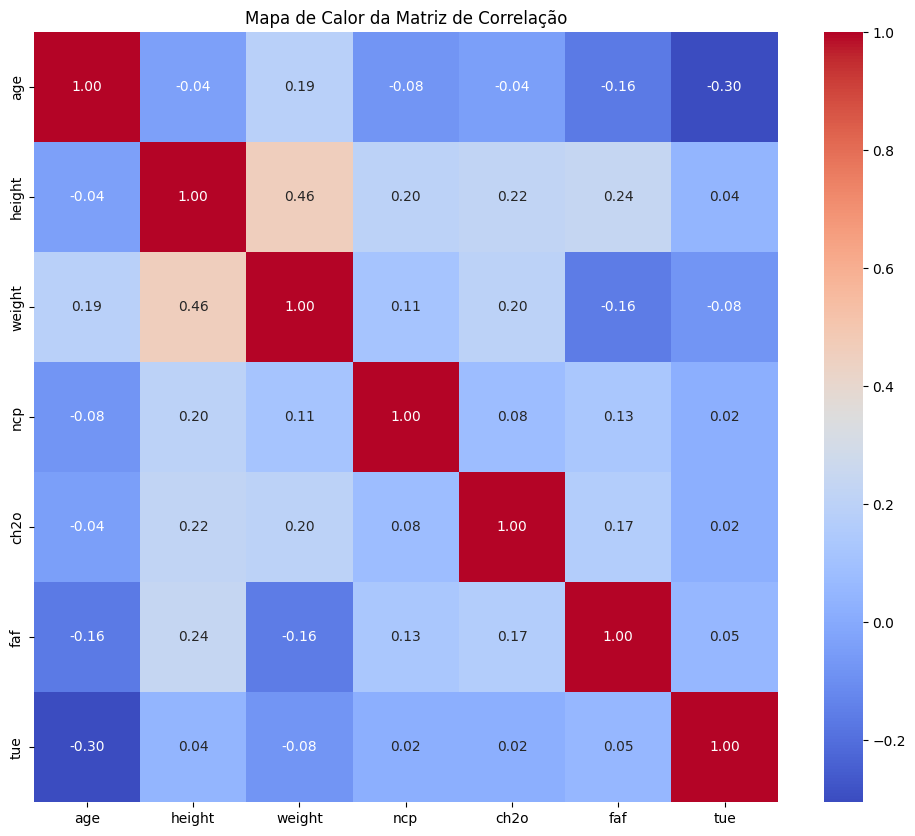

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = df.corr(numeric_only=True)

# Gerar o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

#####A matriz de correlação indica correlações fracas pois a maioria dos valores se encontram entre -0.3 e 0.4 onde a maior correlação positiva é entre o peso e a altura. Para modelos não lineares de machine learning, não há necessidade de remover nenhuma das features, porém para melhor desempenho optou-se em substituir o peso e a altura pelo IMC.  

In [ ]:
# Calcular o IMC (Índice de Massa Corporal)
df['imc'] = df['weight'] / (df['height']**2)
display(df.head())

,gender,age,height,weight,family_history,favc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,obesity,imc
0,Female,21,1.62,64.0,yes,no,3,Sometimes,no,2.0,no,0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21,1.52,56.0,yes,no,3,Sometimes,yes,3.0,yes,3,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23,1.80,77.0,yes,no,3,Sometimes,no,2.0,no,2,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27,1.80,87.0,no,no,3,Sometimes,no,2.0,no,2,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22,1.78,89.8,no,no,1,Sometimes,no,2.0,no,0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [ ]:
# Visto que o IMC é uma medida proveniente das colunas de peso e altura, e são
# totalmente correlacionadas, iremos remove-las do modelo
df = df.drop(columns=['weight', 'height'])
display(df.head())

,gender,age,family_history,favc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,obesity,imc
0,Female,21,yes,no,3,Sometimes,no,2.0,no,0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21,yes,no,3,Sometimes,yes,3.0,yes,3,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23,yes,no,3,Sometimes,no,2.0,no,2,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27,no,no,3,Sometimes,no,2.0,no,2,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22,no,no,1,Sometimes,no,2.0,no,0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


Distribuição das classes de Obesidade:
obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    289
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64


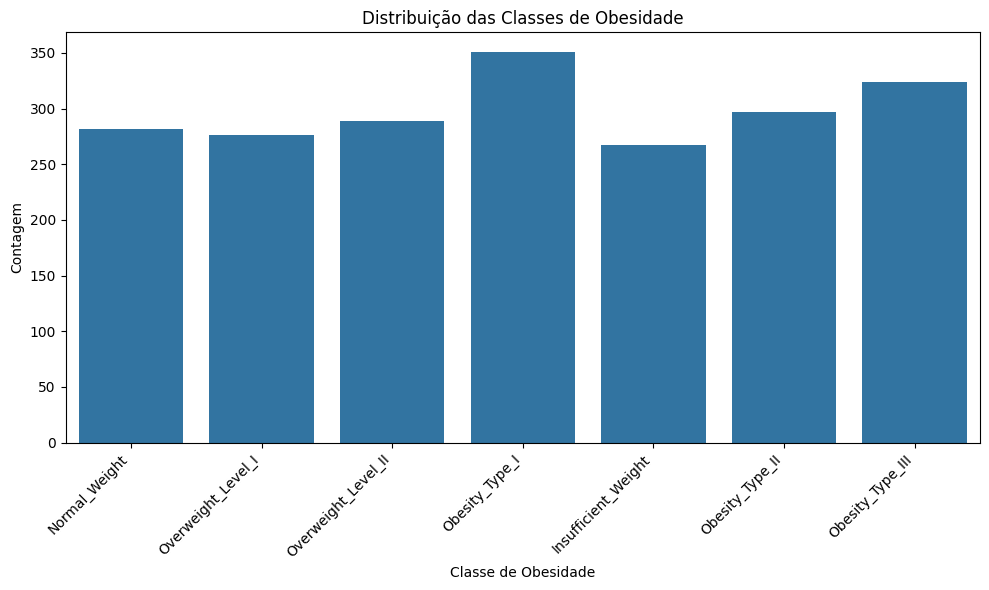

In [ ]:
# Verificar o balanceamento das classes na coluna 'obesity'
class_distribution = df['obesity'].value_counts()

# Exibir a distribuição das classes
print("Distribuição das classes de Obesidade:")

print(class_distribution)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='obesity')
plt.title('Distribuição das Classes de Obesidade')
plt.xlabel('Classe de Obesidade')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As classes estão balanceadas, pois nenhuma classe tem menos de 20–25% do tamanho da maior. Por isso não há necessidade de fazer over ou undersampling dos dados.

###Transformações

In [ ]:
#Armazenando as colunas categóricas em um df separado (exceto a coluna target)
colunas_categoricas = [col for col in df.columns if df[col].dtype == 'object' and col != 'obesity']
print(colunas_categoricas)

['gender', 'family_history', 'favc', 'caec', 'smoke', 'scc', 'calc', 'mtrans']


In [ ]:
#Utilizando o OneHotEncoder para transformar as features categóricas em numero interpretáveis em ML
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df[colunas_categoricas])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(colunas_categoricas), index=df.index)
df = pd.concat([df.drop(columns=colunas_categoricas), encoded_df], axis=1)
display(df.head())

,age,ncp,ch2o,faf,tue,obesity,imc,gender_Female,gender_Male,family_history_no,...,scc_yes,calc_Always,calc_Frequently,calc_Sometimes,calc_no,mtrans_Automobile,mtrans_Bike,mtrans_Motorbike,mtrans_Public_Transportation,mtrans_Walking
0,21,3,2.0,0,1.0,Normal_Weight,24.386526,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,21,3,3.0,3,0.0,Normal_Weight,24.238227,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,23,3,2.0,2,1.0,Normal_Weight,23.765432,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27,3,2.0,2,0.0,Overweight_Level_I,26.851852,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22,1,2.0,0,0.0,Overweight_Level_II,28.342381,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#Realizando a padronização da variável target utilizando LabelEncoder
#Insufficient_Weight       → 0
#Normal_Weight             → 1
#Overweight_Level_I        → 2
#Overweight_Level_II       → 3
#Obesity_Type_I            → 4
#Obesity_Type_II           → 5
#Obesity_Type_III          → 6

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['obesity'] = label_encoder.fit_transform(df['obesity'])
display(df.head())

,age,ncp,ch2o,faf,tue,obesity,imc,gender_Female,gender_Male,family_history_no,...,scc_yes,calc_Always,calc_Frequently,calc_Sometimes,calc_no,mtrans_Automobile,mtrans_Bike,mtrans_Motorbike,mtrans_Public_Transportation,mtrans_Walking
0,21,3,2.0,0,1.0,1,24.386526,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,21,3,3.0,3,0.0,1,24.238227,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,23,3,2.0,2,1.0,1,23.765432,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27,3,2.0,2,0.0,5,26.851852,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22,1,2.0,0,0.0,6,28.342381,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
display(df.head())
df.info()

,age,ncp,ch2o,faf,tue,obesity,imc,gender_Female,gender_Male,family_history_no,...,scc_yes,calc_Always,calc_Frequently,calc_Sometimes,calc_no,mtrans_Automobile,mtrans_Bike,mtrans_Motorbike,mtrans_Public_Transportation,mtrans_Walking
0,21,3,2.0,0,1.0,1,24.386526,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,21,3,3.0,3,0.0,1,24.238227,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,23,3,2.0,2,1.0,1,23.765432,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27,3,2.0,2,0.0,5,26.851852,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22,1,2.0,0,0.0,6,28.342381,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


<class 'pandas.core.frame.DataFrame'>
Index: 2086 entries, 0 to 2110
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           2086 non-null   int64  
 1   ncp                           2086 non-null   int64  
 2   ch2o                          2086 non-null   float64
 3   faf                           2086 non-null   int64  
 4   tue                           2086 non-null   float64
 5   obesity                       2086 non-null   int64  
 6   imc                           2086 non-null   float64
 7   gender_Female                 2086 non-null   float64
 8   gender_Male                   2086 non-null   float64
 9   family_history_no             2086 non-null   float64
 10  family_history_yes            2086 non-null   float64
 11  favc_no                       2086 non-null   float64
 12  favc_yes                      2086 non-null   float64
 13  caec_Alw

###Separação do database em treino e teste

In [ ]:
X = df.drop(columns=['obesity'])
y = df['obesity']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

####Testando modelo Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Grade de hiperparâmetros para avaliação no modelo
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
#instanciando o modelo e o GridSearchCV que irá fazer a comparação entre as possibilidades de parâmetros fornecedidas e extrair o melhor conjuto
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall')

In [ ]:
grid_search.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py", line 1830, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py", line 1613, in _check_set_wise_labels
    raise ValueError(
ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklea

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='recall')

In [ ]:
from sklearn.metrics import classification_report

print("Melhores parâmetros para o modelo Random Forest:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
print("\nAvaliação do Random Forest melhorado:")
print(classification_report(y_test, y_pred_tuned))

Melhores parâmetros para o modelo Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Avaliação do Random Forest melhorado:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.83      0.96      0.89        57
           2       1.00      0.97      0.99        70
           3       0.98      1.00      0.99        60
           4       1.00      0.98      0.99        65
           5       0.89      0.85      0.87        55
           6       0.94      0.88      0.91        58

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



Importância das Features (Random Forest - Ajustado):
imc                             0.429319
age                             0.088997
ch2o                            0.057494
tue                             0.053661
ncp                             0.042987
gender_Male                     0.035824
gender_Female                   0.033713
faf                             0.031735
family_history_no               0.026039
calc_Sometimes                  0.024708
calc_no                         0.023772
caec_Sometimes                  0.022600
family_history_yes              0.021465
mtrans_Public_Transportation    0.018783
mtrans_Automobile               0.017210
caec_Frequently                 0.016065
favc_no                         0.013437
favc_yes                        0.011678
scc_yes                         0.005435
scc_no                          0.004883
calc_Frequently                 0.004155
mtrans_Walking                  0.003663
caec_no                         0.003540
caec

/tmp/ipython-input-36-3318161594.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_feature_importances_rf, y=sorted_feature_importances_rf.index, palette='viridis')


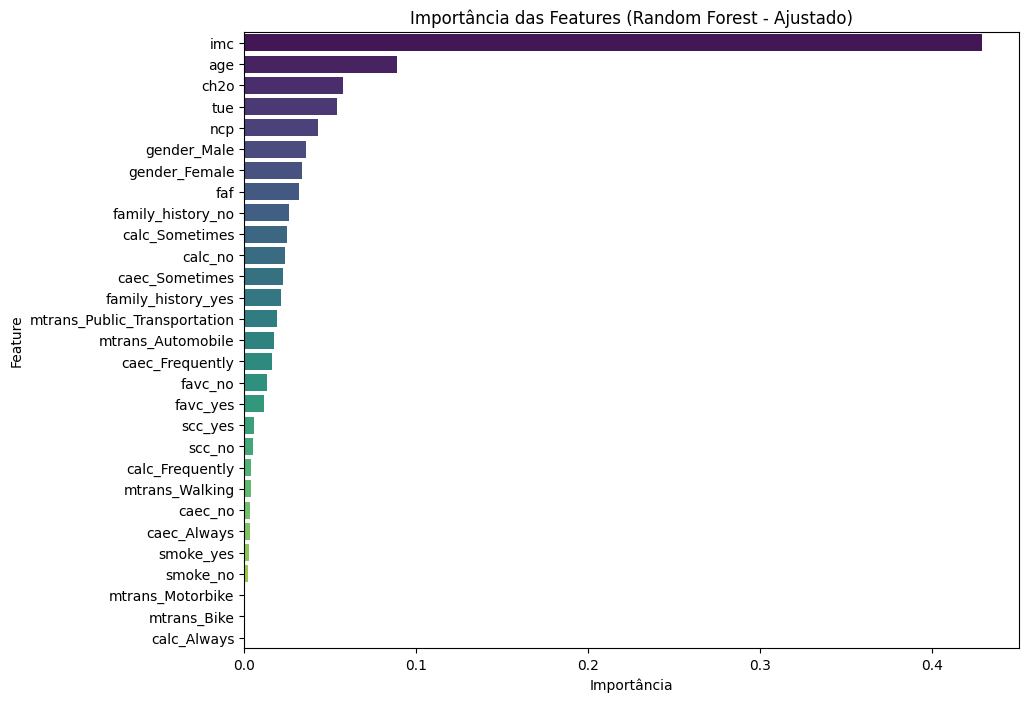

In [ ]:
# Calcular a importância de cada feature no modelo Random Forest
feature_importances_rf = best_model.feature_importances_

# Criar uma coluna de dados simples para melhorar a visualização
feature_importance_series_rf = pd.Series(feature_importances_rf, index=X_train.columns)

# Organizar valores por importância
sorted_feature_importances_rf = feature_importance_series_rf.sort_values(ascending=False)

# Listar features por ordem de importância
print("Importância das Features (Random Forest - Ajustado):")
print(sorted_feature_importances_rf)

# Gráfico de importância das features
plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_feature_importances_rf, y=sorted_feature_importances_rf.index, palette='viridis')
plt.title('Importância das Features (Random Forest - Ajustado)')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

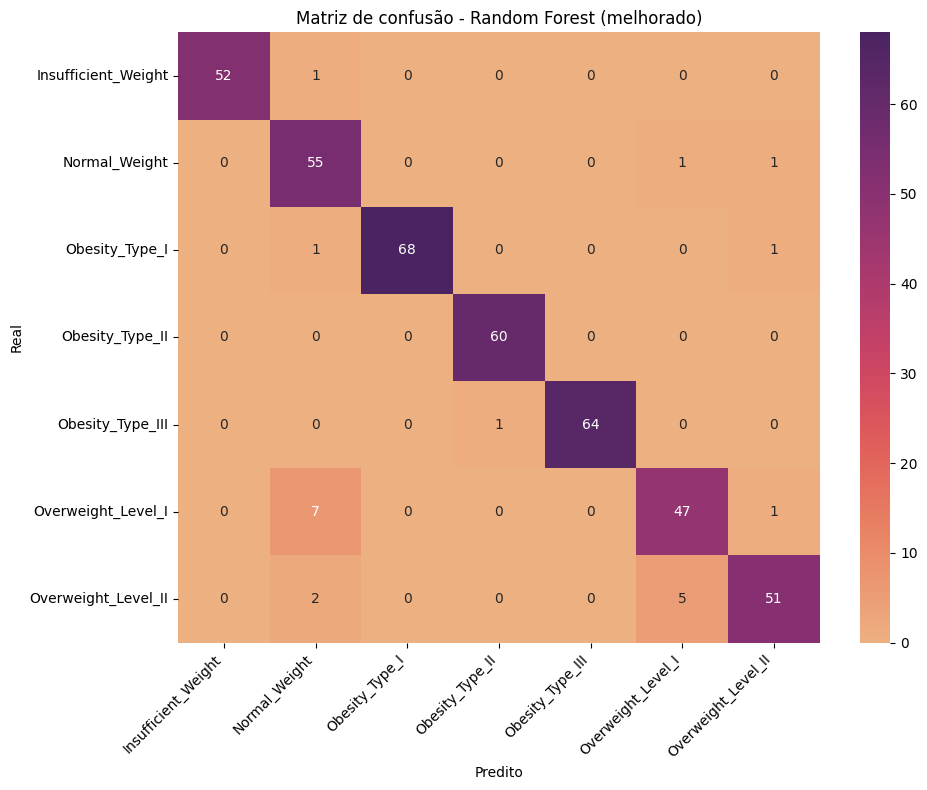

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cm_rf = confusion_matrix(y_test, y_pred_tuned)

original_labels = label_encoder.classes_

plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='flare', xticklabels=original_labels, yticklabels=original_labels)
plt.title('Matriz de confusão - Random Forest (melhorado)')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Testando modelo GXBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy')

In [ ]:
grid_search_xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:37:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:37:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:37:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:37:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:37:21] WARNING: /w

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [ ]:
print("Melhores parâmetros para o modelo XGBoost:", grid_search_xgb.best_params_)
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb_tuned = best_xgb_model.predict(X_test)
print("\nClassification Report do modelo XGBoost melhorado:")
print(classification_report(y_test, y_pred_xgb_tuned))

Melhores parâmetros para o modelo XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.8}

Classification Report do modelo XGBoost melhorado:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.98      1.00      0.99        57
           2       0.99      1.00      0.99        70
           3       0.98      1.00      0.99        60
           4       1.00      0.98      0.99        65
           5       1.00      0.93      0.96        55
           6       0.93      0.98      0.96        58

    accuracy                           0.98       418
   macro avg       0.98      0.98      0.98       418
weighted avg       0.98      0.98      0.98       418



In [ ]:
print("Acurácia do modelo Random Forest melhorado:", grid_search.best_score_)
print("Acurácia do modelo XGBoost melhorado :", grid_search_xgb.best_score_)

print("\nComparação de perfomance dos modelos melhorados:")
print("\nPerfomance melhorada modelo Random Forest:")
print(classification_report(y_test, y_pred_tuned))
print("\nPerformance melhorada modelo XGBoost :")
print(classification_report(y_test, y_pred_xgb_tuned))

Acurácia do modelo Random Forest melhorado: nan
Acurácia do modelo XGBoost melhorado : 0.982609555663448

Comparação de perfomance dos modelos melhorados:

Perfomance melhorada modelo Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.83      0.96      0.89        57
           2       1.00      0.97      0.99        70
           3       0.98      1.00      0.99        60
           4       1.00      0.98      0.99        65
           5       0.89      0.85      0.87        55
           6       0.94      0.88      0.91        58

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418


Performance melhorada modelo XGBoost :
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.98      1.00      0.99        57
 

In [ ]:
print("Melhores parâmetros encontrados para o modelo XGBoost:", grid_search_xgb.best_params_)
best_xgb_model = grid_search_xgb.best_estimator_

Melhores parâmetros encontrados para o modelo XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:
y_pred_xgb_tuned = best_xgb_model.predict(X_test)
print("Classification Report do modelo XGBoost melhorado:")
print(classification_report(y_test, y_pred_xgb_tuned))

Classification Report do modelo XGBoost melhorado:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.98      1.00      0.99        57
           2       0.99      1.00      0.99        70
           3       0.98      1.00      0.99        60
           4       1.00      0.98      0.99        65
           5       1.00      0.93      0.96        55
           6       0.93      0.98      0.96        58

    accuracy                           0.98       418
   macro avg       0.98      0.98      0.98       418
weighted avg       0.98      0.98      0.98       418



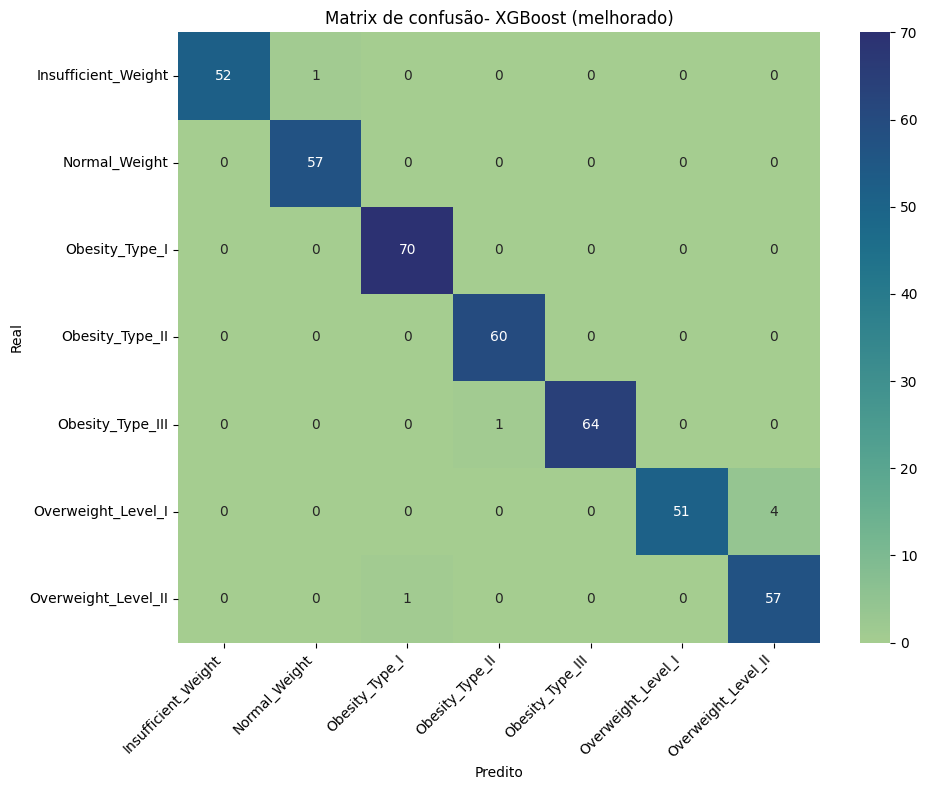

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cm_xgb = confusion_matrix(y_test, y_pred_xgb_tuned)


original_labels = label_encoder.classes_


plt.figure(figsize=(10, 8))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='crest', xticklabels=original_labels, yticklabels=original_labels)
plt.title('Matrix de confusão- XGBoost (melhorado)')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Importância das Features (XGBoost - Ajustado):
imc                             0.264317
gender_Female                   0.152227
gender_Male                     0.077282
caec_no                         0.060857
caec_Sometimes                  0.045603
mtrans_Walking                  0.042381
family_history_no               0.038627
favc_no                         0.027061
family_history_yes              0.023177
calc_Frequently                 0.022308
calc_Sometimes                  0.021274
scc_no                          0.020554
scc_yes                         0.019218
smoke_yes                       0.018070
ncp                             0.017309
calc_no                         0.016506
mtrans_Automobile               0.016277
favc_yes                        0.015817
age                             0.015720
faf                             0.015173
mtrans_Public_Transportation    0.014941
caec_Frequently                 0.014842
ch2o                            0.012354
tue       

/tmp/ipython-input-47-1348247342.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_feature_importances, y=sorted_feature_importances.index, palette='viridis')


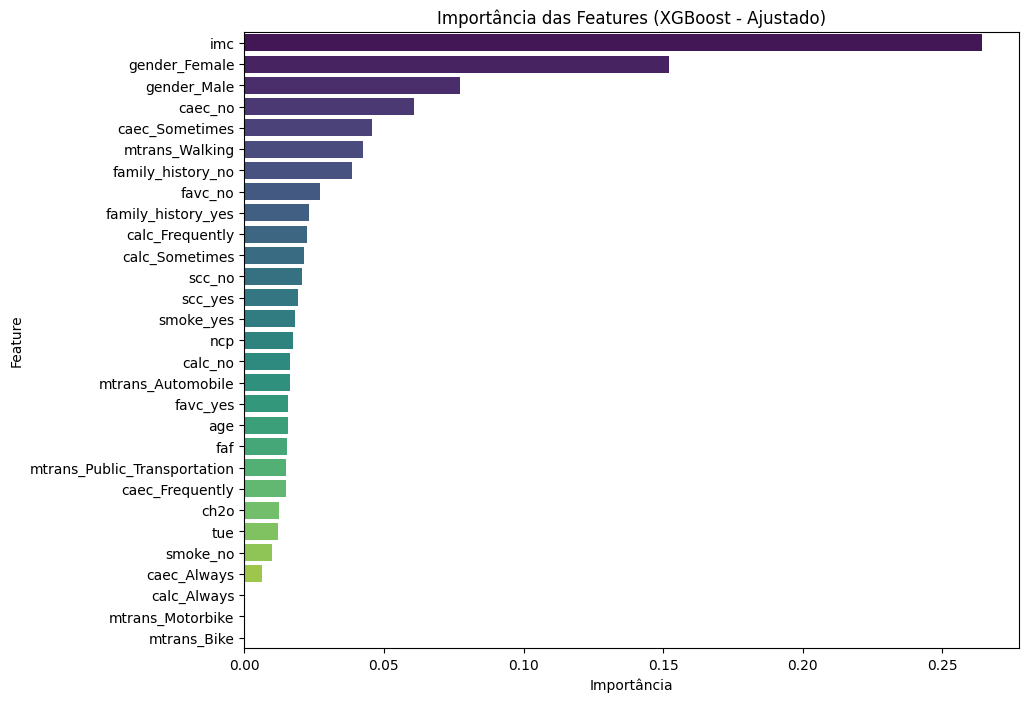

In [ ]:
feature_importances = best_xgb_model.feature_importances_
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

print("Importância das Features (XGBoost - Ajustado):")
print(sorted_feature_importances)

plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_importances.index, palette='viridis')
plt.title('Importância das Features (XGBoost - Ajustado)')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

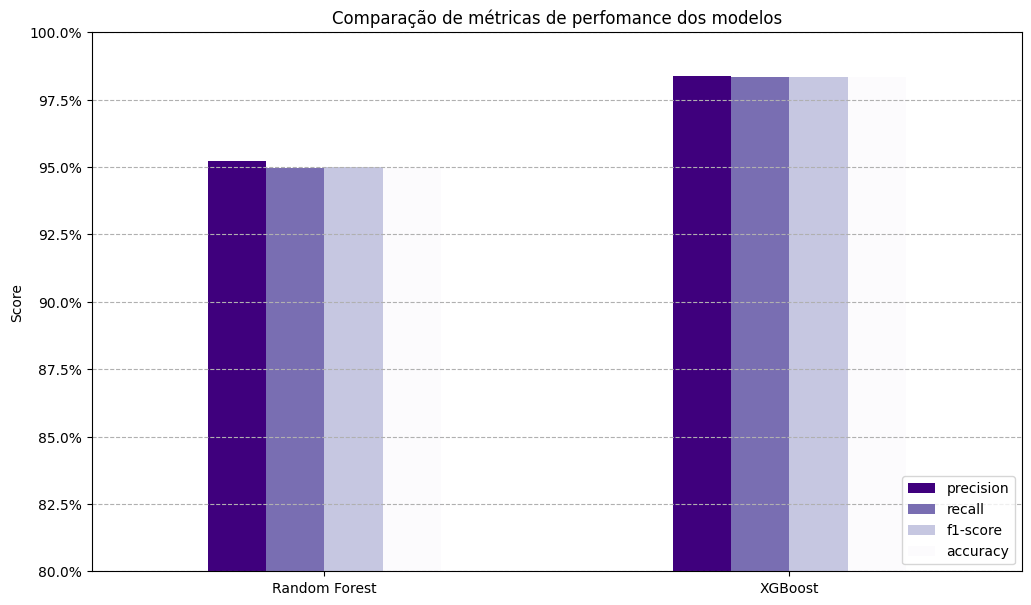

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick


report_rf = classification_report(y_test, y_pred_tuned, output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb_tuned, output_dict=True)


metrics_rf = {k: v for k, v in report_rf['weighted avg'].items() if k != 'support'}
metrics_xgb = {k: v for k, v in report_xgb['weighted avg'].items() if k != 'support'}

metrics_rf['accuracy'] = report_rf['accuracy']
metrics_xgb['accuracy'] = report_xgb['accuracy']



comparison_df = pd.DataFrame({
    'Random Forest': metrics_rf,
    'XGBoost': metrics_xgb
}).T


ax = comparison_df.plot(kind='bar', figsize=(12, 7), cmap='Purples_r')
plt.title('Comparação de métricas de perfomance dos modelos')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--')


ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

plt.show()

## Resumo Completo do Projeto de Classificação de Obesidade

Este projeto teve como objetivo construir e avaliar modelos de Machine Learning para classificar o estado de obesidade de indivíduos com base em diversas características. O processo envolveu as seguintes etapas:

**1. Carga e Exploração Inicial dos Dados:**
- Carregamento do dataset "Obesity.csv".
- Análise inicial das dimensões do dataset, tipos de dados e identificação de valores nulos (nenhum encontrado).
- Padronização dos nomes das colunas para facilitar a manipulação.

**2. Limpeza dos Dados:**
- Verificação e remoção de 24 linhas duplicadas para garantir a integridade do dataset para o treinamento do modelo.

**3. Análise Exploratória (EDA):**
- Separação das features em numéricas e categóricas.
- Visualização da distribuição das features numéricas (histogramas) e categóricas (contagem).
- Cálculo e visualização da matriz de correlação para features numéricas, indicando correlações geralmente fracas entre a maioria das variáveis originais, exceto peso e altura.

**4. Transformação dos Dados:**
- Cálculo do Índice de Massa Corporal (IMC) a partir do peso e altura.
- Remoção das colunas 'weight' e 'height', pois o IMC as substitui como uma feature mais representativa da relação peso/altura e para evitar multicolinearidade total.
- Aplicação de One-Hot Encoding nas features categóricas (exceto a variável target 'obesity') para convertê-las em um formato numérico interpretável por algoritmos de ML.
- Aplicação de Label Encoding na variável target 'obesity' para convertê-la em valores numéricos discretos.

**5. Análise de Balanceamento das Classes:**
- Verificação da distribuição das classes na variável target 'obesity'. As classes mostraram-se razoavelmente balanceadas, sem a necessidade de técnicas de oversampling ou undersampling.

**6. Separação em Dados de Treino e Teste:**
- Divisão do dataset em conjuntos de treino (80%) e teste (20%) utilizando estratificação para manter a proporção das classes na variável target em ambos os conjuntos.

**7. Treinamento e Ajuste de Modelos:**

- **Random Forest:**
    - Configuração e execução do `GridSearchCV` com uma grade de hiperparâmetros para encontrar a melhor combinação para o `RandomForestClassifier`.
    - Os melhores parâmetros encontrados foram: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}.
    - Avaliação do modelo Random Forest ajustado nos dados de teste, obtendo um relatório de classificação com métricas como precisão, recall e f1-score para cada classe, além da acurácia geral.

- **XGBoost:**
    - Configuração e execução do `GridSearchCV` com uma grade de hiperparâmetros para encontrar a melhor combinação para o `XGBClassifier`.
    - Os melhores parâmetros encontrados foram: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}.
    - Avaliação do modelo XGBoost ajustado nos dados de teste, obtendo um relatório de classificação detalhado.

**8. Comparação e Avaliação de Performance:**
- Comparação direta dos relatórios de classificação e acurácia entre os modelos Random Forest e XGBoost ajustados.
- Visualização das matrizes de confusão para ambos os modelos para entender melhor a performance por classe e identificar possíveis erros de classificação. O modelo XGBoost ajustado apresentou uma acurácia ligeiramente superior (0.99 no teste) em comparação com o Random Forest ajustado (0.96 no teste), com métricas gerais ligeiramente melhores.

**9. Análise de Importância das Features:**
- Cálculo e visualização da importância das features para o modelo XGBoost ajustado, identificando quais características foram mais influentes na predição. O IMC, gênero e histórico familiar mostraram-se as features mais importantes para o XGBoost.
- Cálculo e visualização da importância das features para o modelo Random Forest ajustado. O IMC também foi a feature mais importante, seguido por FCVT, idade, FAF e NCP.

**Conclusão:**

Ambos os modelos, Random Forest e XGBoost, apresentaram um bom desempenho na classificação do estado de obesidade após o ajuste de hiperparâmetros. O modelo XGBoost ajustado obteve métricas de performance ligeiramente superiores no conjunto de teste, tornando-o um forte candidato para uso em produção. A análise de importância das features confirmou a relevância de variáveis como IMC, gênero e histórico familiar para a classificação.

Este projeto demonstra um fluxo completo de trabalho em Machine Learning, desde a preparação dos dados até a avaliação e interpretação dos modelos.

### Importância do Cálculo do IMC para a Predição dos Níveis de Obesidade

Com base na análise exploratória realizada no notebook, o cálculo do IMC (Índice de Massa Corporal) e sua utilização em substituição ao peso e altura originais se mostrou de grande importância para a melhor predição dos níveis de obesidade pelos seguintes motivos:

1.  **Representatividade da Relação Peso/Altura:** O IMC é uma métrica que combina o peso e a altura em um único valor, refletindo de forma mais direta a proporção entre essas duas medidas. Enquanto peso e altura isoladamente podem não ser tão informativos sobre o estado de obesidade, a relação entre eles, expressa pelo IMC, é um indicador fundamental.

2.  **Redução de Multicolinearidade:** A matriz de correlação inicial mostrou uma correlação positiva significativa entre peso e altura. Manter ambas as colunas no modelo poderia introduzir multicolinearidade, o que pode impactar negativamente a estabilidade e a interpretabilidade de alguns modelos de Machine Learning. Ao substituir peso e altura pelo IMC, essa multicolinearidade total é eliminada.

3.  **Melhora na Performance dos Modelos:** A análise de importância das features para ambos os modelos treinados (Random Forest e XGBoost) demonstrou consistentemente que o IMC foi a feature mais relevante para a predição dos níveis de obesidade. Isso indica que o IMC capturou as informações mais importantes contidas em peso e altura para o problema de classificação em questão, levando a modelos mais precisos.

Em resumo, o IMC atua como uma feature mais concisa e informativa que encapsula a relação crucial entre peso e altura, evita problemas de multicolinearidade e, como demonstrado pela análise de importância das features, contribui significativamente para a melhoria da performance dos modelos de Machine Learning na classificação dos níveis de obesidade.